In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [15]:
df = pd.read_csv("gpu_specs_v6.csv") 
df.fillna(3000,inplace=True);
print(df)
valid = df.notna().all(axis=1)
print(valid.head())
x=df.iloc[:35,3:11].values
print(x)
y=df.iloc[:35,0]
print(y)


     manufacturer       productName  releaseYear  memSize  memBusWidth  \
0          NVIDIA  GeForce RTX 4050       2023.0    8.000        128.0   
1           Intel         Arc A350M       2022.0    4.000         64.0   
2           Intel         Arc A370M       2022.0    4.000         64.0   
3           Intel          Arc A380       2022.0    4.000         64.0   
4           Intel         Arc A550M       2022.0    8.000        128.0   
...           ...               ...          ...      ...          ...   
2884         3dfx  Voodoo5 5000 AGP       3000.0    0.016        128.0   
2885         3dfx  Voodoo5 5000 PCI       3000.0    0.016        128.0   
2886         3dfx      Voodoo5 6000       3000.0    0.032        128.0   
2887        Intel            Xe DG1       3000.0    4.000        128.0   
2888        Intel        Xe DG1-SDV       3000.0    8.000        128.0   

      gpuClock  memClock  unifiedShader  tmu  rop  pixelShader  vertexShader  \
0         1925    2250.0       

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.50,random_state=240)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(xtrain)
X_test=sc.transform(xtest)
print(X_train)

[[-0.54462208 -0.3962525   0.79304538 -1.09242419  2.83618075  2.8526567
   2.84900189  0.        ]
 [ 1.8027557   1.79773919 -1.49494429  1.64512565 -0.7911106  -0.76551437
  -0.82945625  0.        ]
 [ 1.8027557   1.79773919  1.07243686  1.64512565 -0.7911106  -0.76551437
  -0.65429157  0.        ]
 [-0.55724239 -0.61095505 -1.49494429 -0.80641152 -0.51208819 -0.18193839
   0.04636712  0.        ]
 [-0.56039747 -0.66463069  1.57232107 -0.39782199 -0.7911106  -0.76551437
  -0.65429157  0.        ]
 [-0.56197501 -0.66463069 -0.33962277 -0.80641152 -0.73530612 -0.88222957
  -1.00462092  0.        ]
 [-0.55724239 -0.50360378  0.18140458 -0.39782199  0.10176111 -0.0068656
   0.39669647  0.        ]
 [ 1.8027557   1.79773919  0.31732476  1.64512565 -0.87481733 -0.94058717
  -1.00462092  0.        ]
 [-0.55408732 -0.55727941  0.95917004  0.41935707  0.71561042  0.63506798
   0.39669647  0.        ]
 [-0.56039747 -0.61095505  0.38528485 -0.39782199 -0.45628371 -0.59044158
  -0.65429157  0.  

In [24]:
model.fit(X_train,ytrain)
y_predication=model.predict(X_test)
print(y_predication)

['NVIDIA' 'NVIDIA' 'NVIDIA' 'Intel' 'NVIDIA' 'NVIDIA' 'NVIDIA' 'NVIDIA'
 'NVIDIA' 'NVIDIA' 'Intel' 'NVIDIA' 'NVIDIA' 'NVIDIA' 'NVIDIA' 'NVIDIA'
 'Intel' 'NVIDIA']


In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_predication)
print(ytest)
print(y_predication)
print(cm)

29    NVIDIA
6      Intel
17    NVIDIA
1      Intel
23    NVIDIA
9      Intel
0     NVIDIA
21    NVIDIA
18    NVIDIA
19    NVIDIA
3      Intel
28    NVIDIA
11    NVIDIA
14    NVIDIA
7      Intel
26    NVIDIA
2      Intel
8      Intel
Name: manufacturer, dtype: object
['NVIDIA' 'NVIDIA' 'NVIDIA' 'Intel' 'NVIDIA' 'NVIDIA' 'NVIDIA' 'NVIDIA'
 'NVIDIA' 'NVIDIA' 'Intel' 'NVIDIA' 'NVIDIA' 'NVIDIA' 'NVIDIA' 'NVIDIA'
 'Intel' 'NVIDIA']
[[ 3  4]
 [ 0 11]]


In [26]:
v1=cm.shape
corrPred=0
falsePred=0
for row in range(v1[0]):
    for c in range(v1[1]):
        if row==c:
            corrPred+=cm[row,c]
        else:
            falsePred+=cm[row,c]
print('Predicciones correctas', corrPred)
print('Predicciones Incorrectas',falsePred)
print('Exito de Naive Bayes',corrPred/(cm.sum()))

Predicciones correctas 14
Predicciones Incorrectas 4
Exito de Naive Bayes 0.7777777777777778


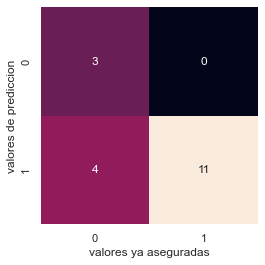

In [27]:
import seaborn as sns; sns.set()
sns.heatmap(cm.T, square=True, annot=True, fmt='d',
            cbar=False)
plt.xlabel('valores ya aseguradas')
plt.ylabel('valores de prediccion');